# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 2 </span>

### Esercizio 2.1

In questo primo esercizio vogliamo calcolare tramite metodi Monte-Carlo il seguente integrale monodimensionale

$$I = \int_0^1 g(x)  dx = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi}{2} x \right) dx$$

Per prima cosa è stato calcolato numericamente l'integrale numericamente con il <b>metodo della media</b>, ovvero

$$I \simeq \frac{1}{M} \sum_{i=1}^{M} \frac{\pi}{2}\cos\left(\frac{\pi}{2} x_i \right)$$ 

dove $x_i$ è un numero campionato in maniera uniforme nell'intervallo di integrazione $[0,1]$. L'errore statistico sulla stima dell'integrale viene sempre calcolato attraverso il metodo del data blocking.

Successivamente viene calcolato lo stesso integrale con lo scopo di ridurre l'incertezza statistica sul valore numerico. Un modo più efficiente rispetto ad aumentare notevolmente il numero di blocchi per ottenere tale scopo è quello di ridurre la varianza dell'integrale. Per fare ciò possiamo moltiplicare e dividere l'integranda per una nuova distribuzione di probabilità, così l'integrale assume la forma

$$I = \int_0^1 \frac{g(x)}{p(x)} p(x)  dx $$

Tanto più la densità di probabilità ha una forma simile alla funzione integranda $g(x)$, tanto più la varianza, e di conseguenza l'errore sulla media, sarà minore. Questa tecnica prende il nome di <b>Importance Sampling</b>. 
Si è scelto di prendere come nuova distribuzione di probabilità la retta tangente all'integranda nel punto $(0,1)$, che, normalizzata nell'intervallo d'integrazione, ha la seguente espressione 

$$p(x) = 2(1-x)$$

Nel grafico sottostante vengono mostrati gli andamenti dell'integranda, della densità di probabilità uniforme $u(x)$ e della densità di probabilità lineare $p(x)$. Si può osservare come la distribuzione lineare sia più simile all'integranda rispetto alla distribuzione uniforme, quindi ci aspettiamo dei risultati più precisi con questo secondo metodo.

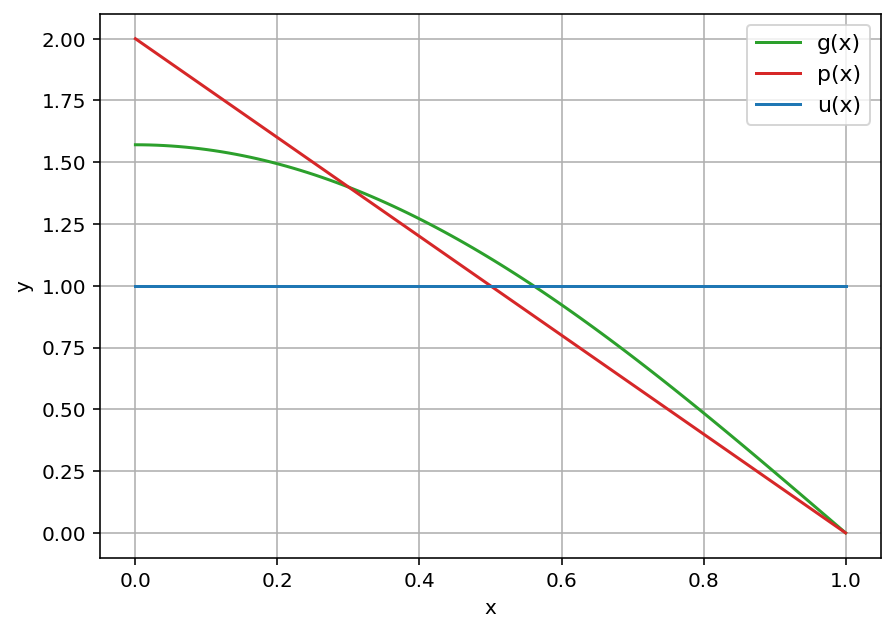

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'

x = np.linspace(0., 1., 100)
y = np.ones(100)
g = np.cos(math.pi/2. * x)
p = 2*(1 - x) 

plt.figure(figsize=(7,5))
plt.plot(x, math.pi/2.*g, color='tab:green', label='g(x)')
plt.plot(x, p, color='tab:red', label='p(x)')
plt.plot(x, y, color='tab:blue', label='u(x)')
plt.xlabel(r'x', fontsize=10)
plt.ylabel(r'y', fontsize=10)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True)
plt.show()

È possibile quindi ottenere una nuova stima dell'integrale dalla seguente espressione

$$I \simeq \frac{1}{M} \sum_{i=1}^{M} \frac{\pi}{4} \frac{\cos\left(\frac{\pi}{2} x_i \right)}{1-x_i}$$ 

dove $x_i$ è un numero campionato secondo la densità di probabilità $p(x)$ tramite il metodo dell'inversione della funzione cumulativa. 

Per implementare il codice di questo esercizio si utilizza la programmazione a oggetti di C++. È stata creata la classe <b>Integral</b> contenente due metodi per il calcolo dell'integrale: <b>Ave</b> per il calcolo tramite campionamento uniforme, e <b>Ave_IS</b> per il cacolo tramite Importance Sampling. Tra i membri privati sono presenti un puntatore alla classe <b>Random</b> per il campionamento delle variabili e un puntatore alla classe <b>FunzioneBase</b>, dove si sfrutta l'ereditarietà delle classi in modo da poter scegliere diverse funzioni da integrare, permettendo di avere un codice più generale. 

Sono state effettuate $M=2\cdot 10^6$ estrazioni divise in $N=200$ blocchi. Di seguito sono riportati i grafici della differenza tra il valore numerico dell'integrale, con la relativa incertezza statistica, e il valore atteso al variare del numero di blocchi per entrambi i metodi.

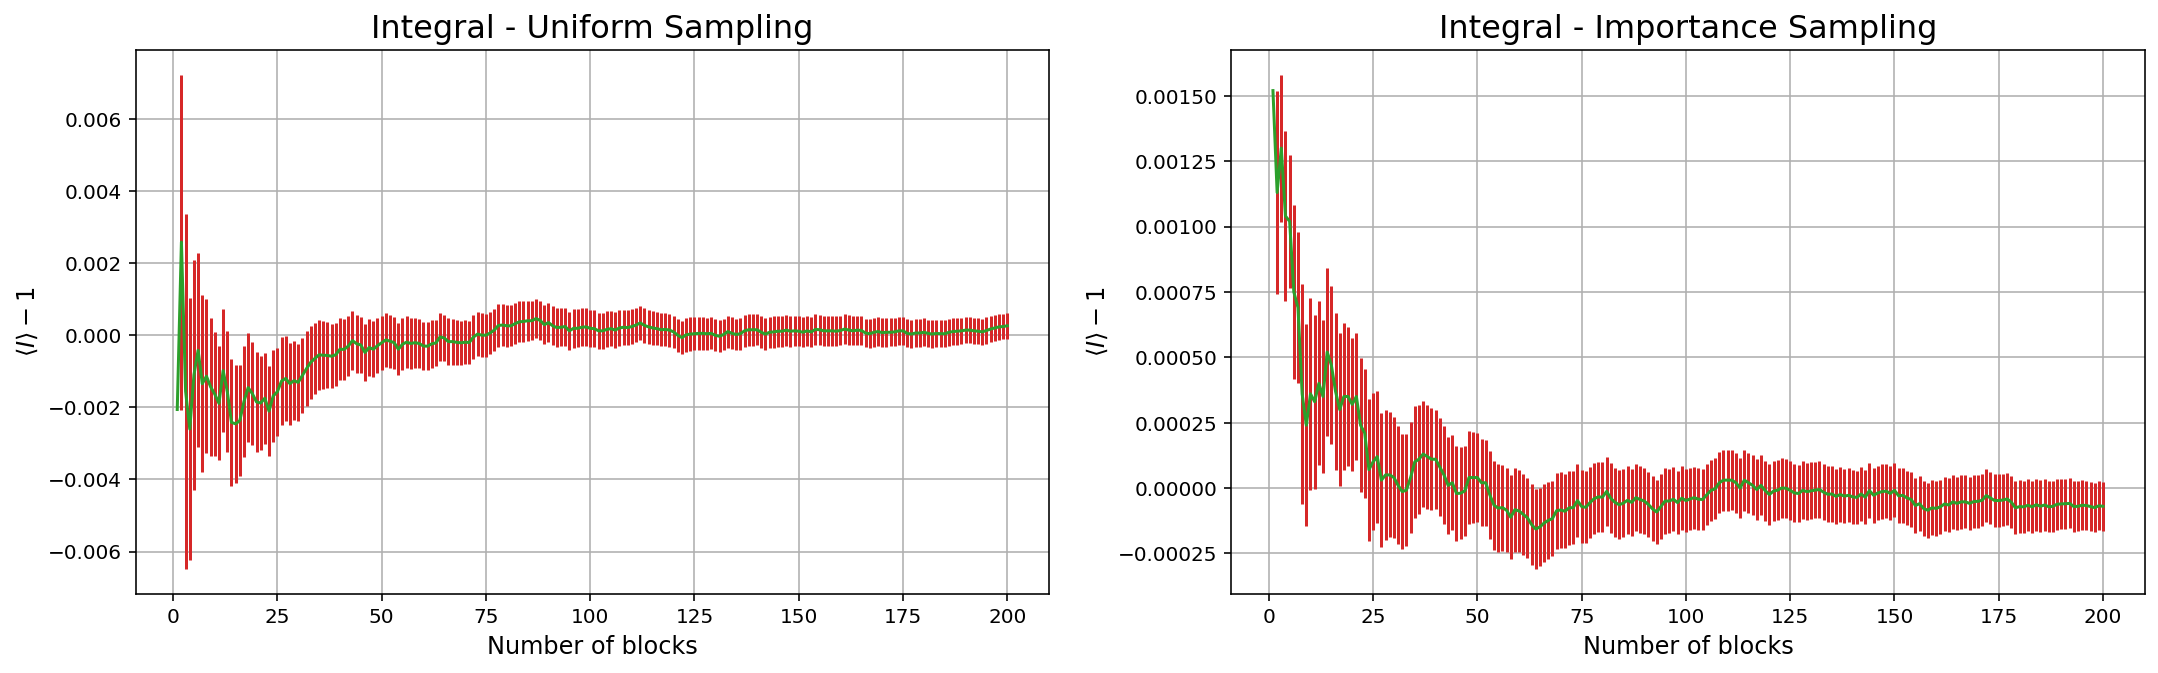

In [2]:
x, integral_prog, err_prog, integral_IS_prog, err_IS_prog = np.loadtxt("2.1/integral.out", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax = ax.reshape(-1)

ax[0].errorbar(x, integral_prog-1, yerr=err_prog, color='tab:green', ecolor='tab:red')
ax[0].set_xlabel(r'Number of blocks', fontsize=12)
ax[0].set_ylabel(r'$\langle I \rangle - 1$', fontsize=12)
ax[0].set_title(f'Integral - Uniform Sampling', fontsize=16)
ax[0].grid(True)

ax[1].errorbar(x, integral_IS_prog-1, yerr=err_IS_prog, color='tab:green', ecolor='tab:red')
ax[1].set_xlabel(r'Number of blocks', fontsize=12)
ax[1].set_ylabel(r'$\langle I \rangle - 1$', fontsize=12)
ax[1].set_title(f'Integral - Importance Sampling', fontsize=16)
ax[1].grid(True)

In entrambi i casi il valore numerico finale risulta compatibile con il valore atteso. Per osservare in modo più diretto la maggior precisione ottenuta tramite il metodo dell'Importance Sampling vengono di seguito sovrapposti i due grafici appena riportati. 

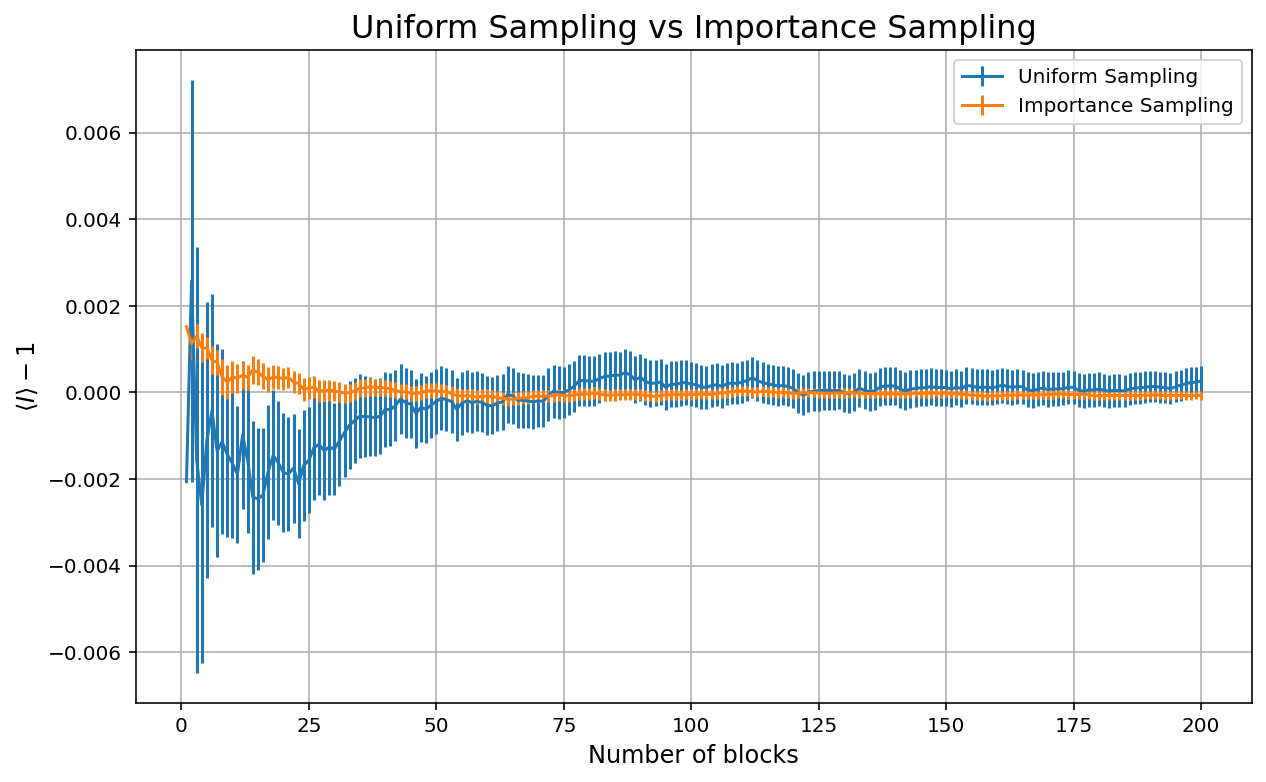

In [3]:
plt.figure(figsize=(10,6))
plt.errorbar(x,integral_prog-1,yerr=err_prog, label="Uniform Sampling", color='tab:blue')
plt.errorbar(x,integral_IS_prog-1,yerr=err_IS_prog, label="Importance Sampling", color='tab:orange')
plt.xlabel(r'Number of blocks', fontsize=12)
plt.ylabel(r'$\langle I \rangle - 1$', fontsize=12)
plt.title(f'Uniform Sampling vs Importance Sampling', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Si osserva immediatamente la maggior efficienza che si ottiene tramite il metodo dell'Importance Sampling: si ha un andamento molto meno fluttuante del valore dell'integrale e in più le incertezze statistiche sono minori all'incirca di un fattore $4$ rispetto a quelle derivanti dal metodo della media.

### Esercizio 2.2

Lo scopo di questo esercizio è di simulare, partendo dall'origine, un <b>Random Walk</b> in 3 dimensioni in due casi:
1. caso <b>discreto</b>: a ogni tempo si effettua un passo di lunghezza $a$ lungo una delle tre direzioni $x$, $y$, $z$ del reticolo.
2. caso <b>continuo</b>: a ogni tempo si effettua un passo di lunghezza fissa $a=1$  in una direzione casuale, ottenuta campionando uniformemente l'angolo solido.

Vogliamo calcolare la distanza media dall'origine $\sqrt{<|\vec r_N|^2>}$  per i valori interi di $N$ in $[0,100]$, verificando che abbia un andamento del tipo $f(N) = k\sqrt{N}$, con $k$ parametro libero. <br> 
Utilizziamo il metodo del data blocking: vengono effettuati $10^4$ random walks suddivisi in $100$ blocchi. Per entrambi i casi vengono di seguito mostrati due grafici: nel primo viene riportata la distanza, con la relativa incertezza statistica, al variare del numero di passi $N$ e viene effettuato il fit con la funzione sopra citata; nel secondo viene mostrata la differenza tra i valori numerici della simulazione e l'andamento ottenuto dal fit.

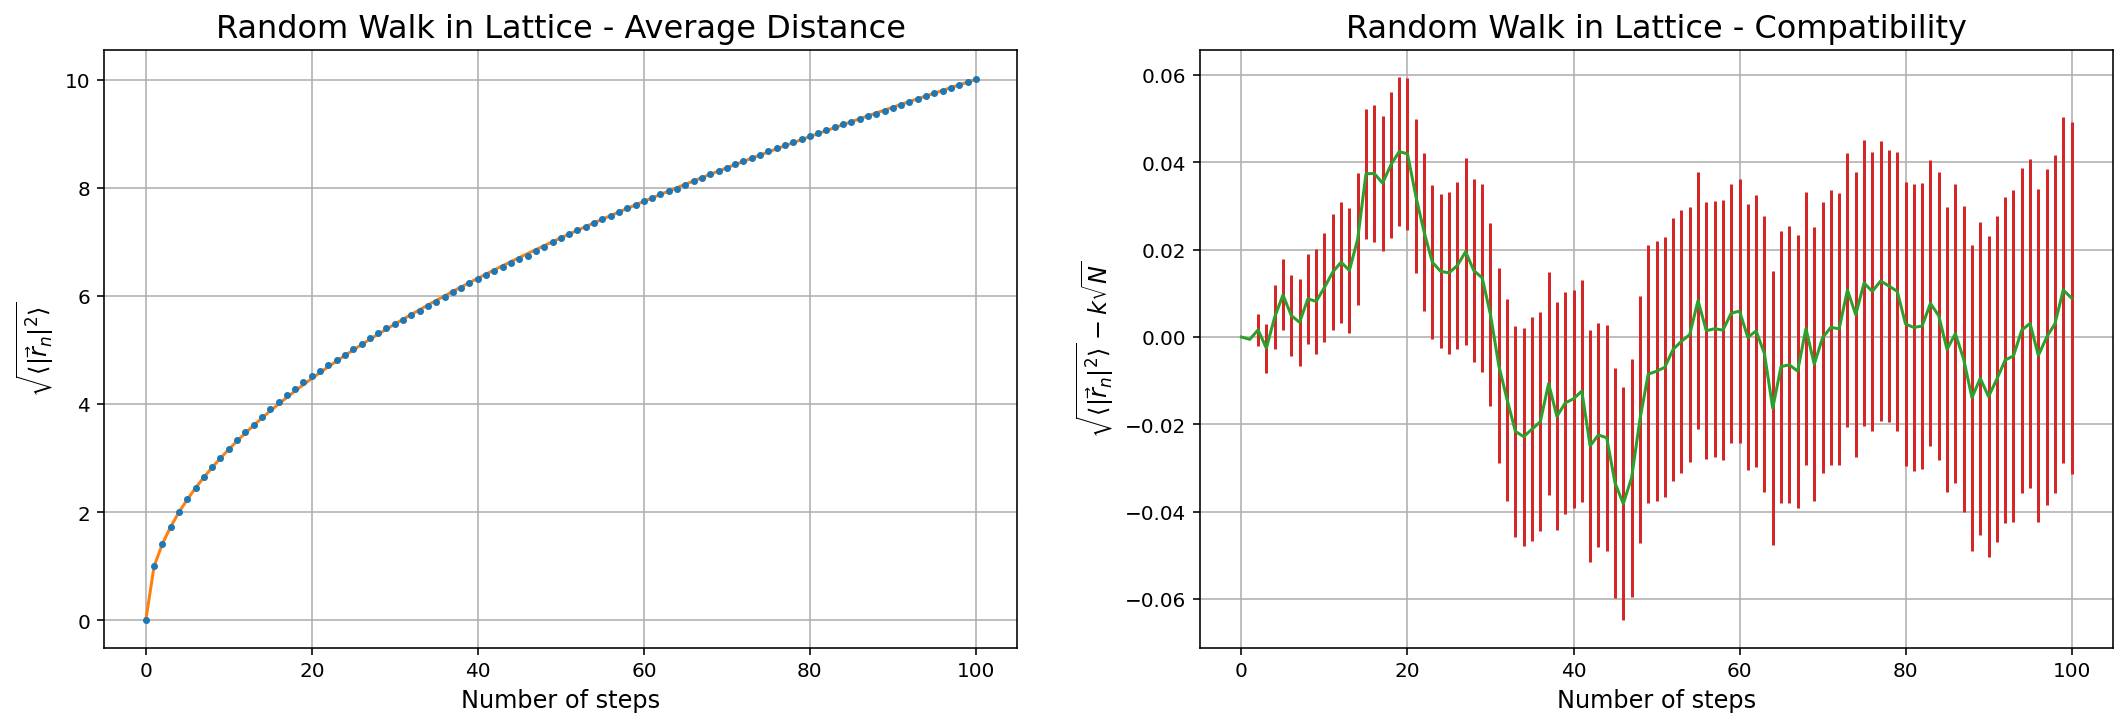

Parametro fit: k = 1.0005 ± 0.0002


In [4]:
x, r_discr, err_discr = np.loadtxt("2.2/RW_discr.out", usecols=(0,1,2), delimiter=' ', unpack='true')

def f(x,a):  # defining the fitting function
    return a * np.sqrt(x)

p_opt, p_cov = curve_fit(f, x, r_discr)
y_fit_discr = f(x,p_opt[0])

fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))
ax = ax.reshape(-1)
ax[0].errorbar(x, r_discr, yerr=err_discr, fmt='.', color='tab:blue', markersize=5)
ax[0].plot(x, y_fit_discr, color='tab:orange')
ax[0].set_xlabel(r'Number of steps', fontsize=12)
ax[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle}$', fontsize=12)
ax[0].set_title(f'Random Walk in Lattice - Average Distance', fontsize=16)
ax[0].grid(True)
ax[1].errorbar(x, r_discr-y_fit_discr, yerr=err_discr, color='tab:green', ecolor='tab:red')
ax[1].set_xlabel(r'Number of steps', fontsize=12)
ax[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle}-k\sqrt{N}$', fontsize=12)
ax[1].set_title(f'Random Walk in Lattice - Compatibility', fontsize=16)
ax[1].grid(True)
plt.show()

print("Parametro fit: k =", '{0:.4f}'.format(p_opt[0]), u"\u00B1", '{0:.4f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

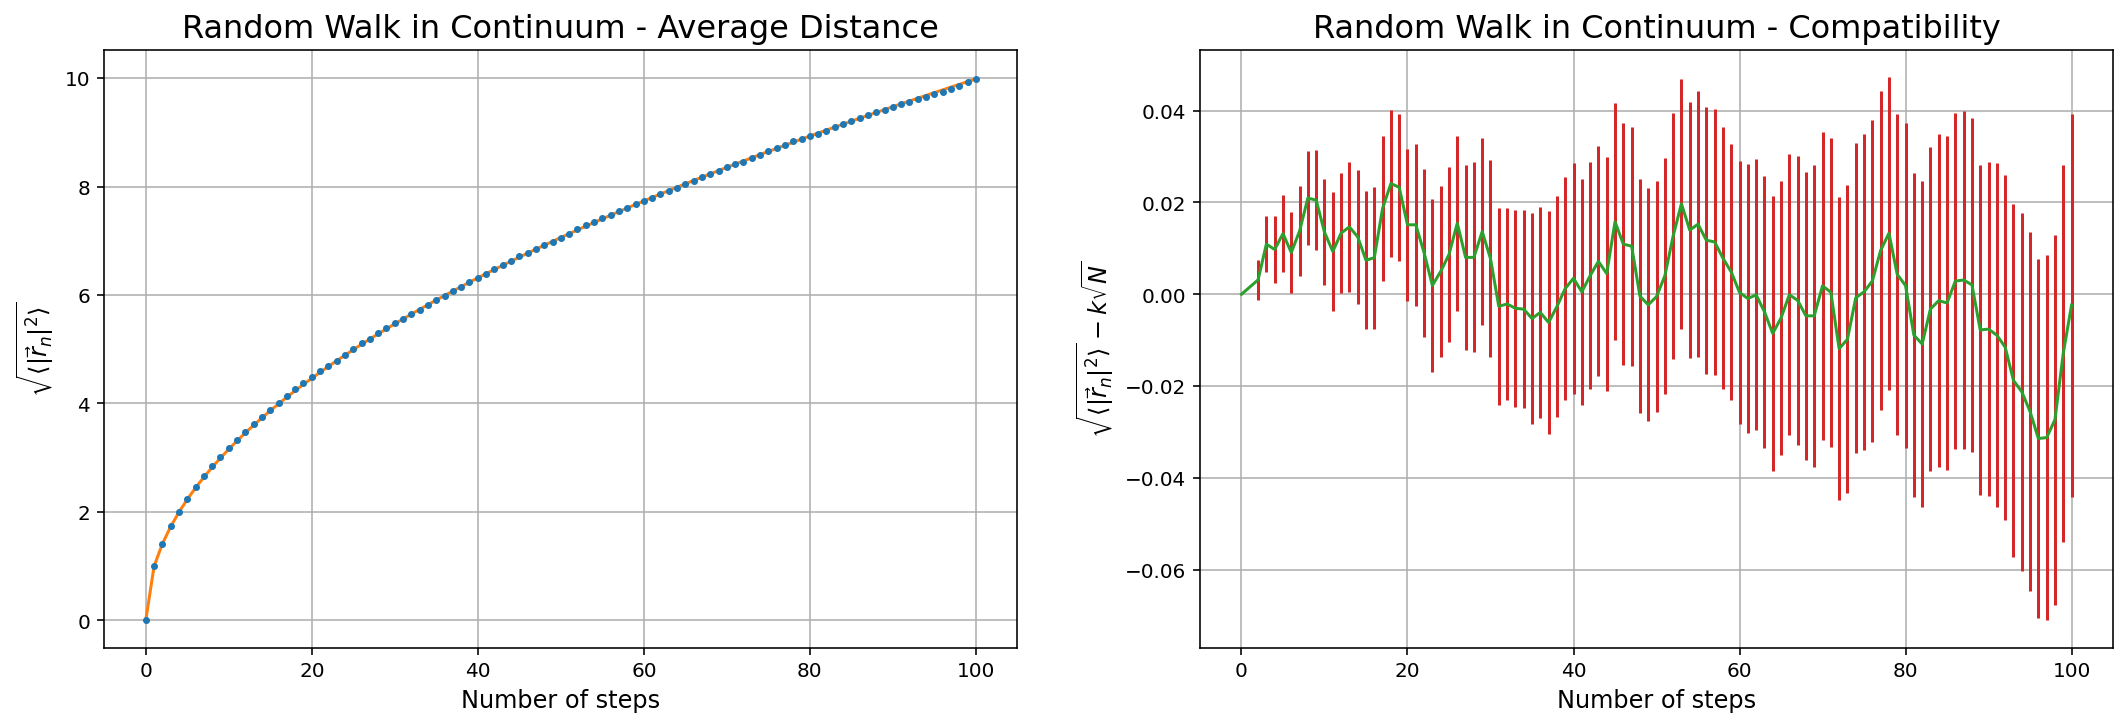

Parametro fit: k = 0.99843 ± 0.00016


In [5]:
x, r_cont, err_cont = np.loadtxt("2.2/RW_cont.out", usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(f, x, r_cont)
y_fit_cont = f(x,p_opt[0])

fig, ax = plt.subplots(1, 2, figsize=(18, 5.5))
ax = ax.reshape(-1)
ax[0].errorbar(x, r_cont, yerr=err_cont, fmt='.', color='tab:blue', markersize=5)
ax[0].plot(x, y_fit_cont, color='tab:orange')
ax[0].set_xlabel(r'Number of steps', fontsize=12)
ax[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle}$', fontsize=12)
ax[0].set_title(f'Random Walk in Continuum - Average Distance', fontsize=16)
ax[0].grid(True)
ax[1].errorbar(x, r_cont-y_fit_cont, yerr=err_cont, color='tab:green', ecolor='tab:red')
ax[1].set_xlabel(r'Number of steps', fontsize=12)
ax[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle}-k\sqrt{N}$', fontsize=12)
ax[1].set_title(f'Random Walk in Continuum - Compatibility', fontsize=16)
ax[1].grid(True)
plt.show()

print("Parametro fit: k =", '{0:.5f}'.format(p_opt[0]), u"\u00B1", '{0:.5f}'.format(np.sqrt(np.diagonal(p_cov))[0]))

In entrambi i casi il fit mostra una buona compatibilità con i dati simulati, indicando un comportamendo diffusivo del sistema. 